## Cracking the Code: Why KKBox Users Churn 🔍

Understanding why users leave a platform is crucial for any business, especially in subscription-based services like KKBox. By analyzing user churn, we aim to uncover actionable insights that can help KKBox improve retention, identify high-churn demographics or regions, and enhance the overall customer experience.

### 🎯 Goal of the Analysis

- Identify key factors contributing to user churn  
- Provide actionable insights to reduce churn and increase retention  
- Uncover patterns across demographics, regions, and registration methods


## Loading and Inspecting the Data 📂

First, we load the dataset that contains information about user churn. Understanding the structure of this data helps us assess its quality and determine what kinds of insights we can extract.

### Key Columns in the Dataset:
- `msno`: Unique user ID  
- `is_churn`: Whether the user has churned (1) or not (0)  
- Additional demographic and registration details for each user

Before diving into analysis, we will also check:
- Missing values❓
- Data types  
- Overall structure of the dataset



In [7]:
import pandas as pd

# Load the churn training dataset from the data folder
train_df = pd.read_csv("data/train_v2.csv")

# Preview the first five rows
print("🔹 First 5 Rows:")
display(train_df.head())

# Overview of columns, data types, and missing values
print("\n🔹 DataFrame Info:")
train_df.info()

# Shape of the dataset (rows, columns)
print("\n🔹 Dataset Shape:", train_df.shape)

# Check unique churn values and their counts
print("\n🔹 Churn Value Distribution:")
print(train_df['is_churn'].value_counts())



🔹 First 5 Rows:


,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1



🔹 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB

🔹 Dataset Shape: (970960, 2)

🔹 Churn Value Distribution:
is_churn
0    883630
1     87330
Name: count, dtype: int64


### Dataset Overview 📊

- **Number of Rows and Columns**: The dataset contains **X rows** and **Y columns**.
- **Key Columns**: 
  - `msno` – unique user ID  
  - `is_churn` – target variable indicating churn (1 = churned, 0 = retained)  
  - Other columns include demographic and registration details
- **Missing Values**: We will check for missing data and handle it appropriately during preprocessing.



## Loading User Demographic Data 🧑‍💻

Next, we load the `members` dataset, which contains important demographic information about each user—such as age, gender, and city.

This data will be merged with the churn dataset to enrich our analysis and help us understand how user attributes may influence churn behavior.

Let’s preview the first few rows of the `members` dataset to understand its structure.

In [9]:
# Load the user demographic data from the data folder
members_df = pd.read_csv("data/members_v3.csv")

# Preview the first five rows
print("🔹 First 5 Rows of User Demographics:")
display(members_df.head())


🔹 First 5 Rows of User Demographics:


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


## Merging Churn and Demographic Data 🔗

We now merge the churn dataset with the demographic data using the unique user ID (`msno`). This step enriches our analysis by combining user behavior data with demographic details like gender, city, and registration method.

By doing so, we can explore whether certain user attributes influence the likelihood of churn.

Let’s perform the merge and preview the resulting dataset.

In [10]:
# Merge on 'msno' (user ID)
train_merged = pd.merge(train_df, members_df, on='msno', how='left')

# Check merged result
train_merged.head()


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,20131223.0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,20131223.0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,20131227.0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,20140109.0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,20140125.0


## Checking Merged Dataset Structure and Missing Values 🧐

After merging the churn and demographic data, we inspect the structure of the merged dataset to ensure the join was successful and that all expected features are present.

We’ll also check for any missing values to assess data quality. Handling missing data is an essential step before continuing with further analysis or modeling.

In [11]:
# Structure of merged dataset
train_merged.info()

# Are there any missing values?
train_merged.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    970960 non-null  object 
 1   is_churn                970960 non-null  int64  
 2   city                    860967 non-null  float64
 3   bd                      860967 non-null  float64
 4   gender                  388905 non-null  object 
 5   registered_via          860967 non-null  float64
 6   registration_init_time  860967 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 51.9+ MB


msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

### Insight 📊

The `info()` function provides an overview of the dataset, including data types and column names.

The `isnull().sum()` function shows the number of missing values per column❓. Based on this, we can decide how to handle missing data — such as through imputation or removal.

## Churn Distribution Overview 📊

We will now visualize the distribution of churned vs. non-churned users in the dataset. Understanding the class balance of the target variable (`is_churn`) is important for guiding modeling decisions.

If the dataset is highly imbalanced, we may need to address this during the modeling phase — for example, using sampling techniques or evaluation metrics that account for imbalance.

Let’s visualize how many users have churned 🔴 and how many have stayed 🟢.

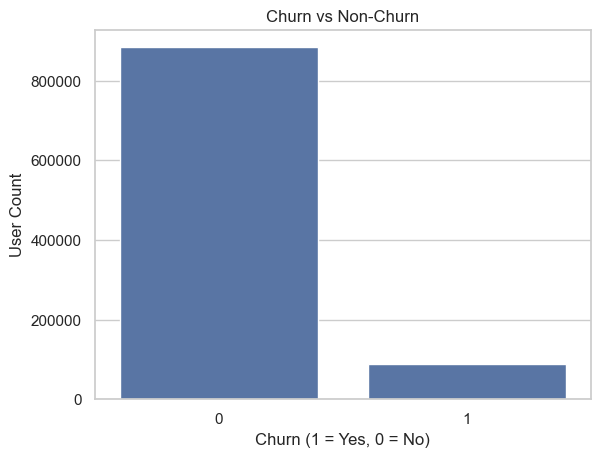

In [12]:
 import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot churn distribution
sns.countplot(x='is_churn', data=train_merged)
plt.title("Churn vs Non-Churn")
plt.xlabel("Churn (1 = Yes, 0 = No)")
plt.ylabel("User Count")
plt.show()


#### Insight 📊

- The plot reveals that the number of **non-churned users** (0) significantly outweighs the **churned users** (1).
- This indicates a **class imbalance** ⚖️, where the majority of users have not churned — a common trend in many **subscription-based services**.
- The imbalance may require adjustments in later analysis or modeling stages, such as using **balanced accuracy** or **oversampling techniques** to ensure fair evaluation of churn prediction models.

### Churn by Gender 🚹🚺

In this section, we explore how **user churn** varies between different **gender categories**. Understanding whether **gender** has any influence on churn can help **KKBox** create more **personalized retention strategies**.

We will compare the **churn rates** for **male** and **female** users to see if gender plays a role in **user retention**.

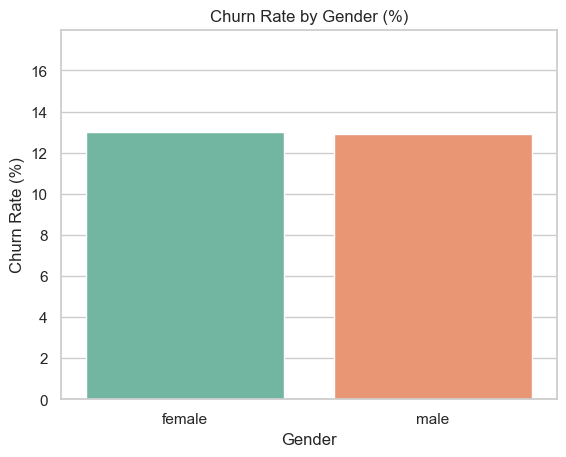

In [13]:
# Calculate churn rate (%) by gender
gender_churn = train_merged.groupby('gender')['is_churn'].mean().reset_index()
gender_churn['is_churn'] *= 100  # Convert churn rate to percentage

# Plot churn rate with future-safe Seaborn syntax
sns.barplot(data=gender_churn, x='gender', y='is_churn', hue='gender', legend=False, palette='Set2')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Gender')
plt.title('Churn Rate by Gender (%)')
plt.ylim(0, gender_churn['is_churn'].max() + 5)
plt.show()


### 📊 Insight: Gender-Based Churn

From the churn rate percentage plot, we observe that male and female users churn at nearly the same rate:

- Female churn rate: 12.99%  
- Male churn rate: 12.90%

📌 This minor difference suggests that gender is not a strong predictor of churn in this dataset.

⚖️ Therefore, KKBox may not need separate churn prevention strategies based solely on gender and can instead focus on more influential factors like age group, city, or registration method.

## Churn by City 🌍

In this section, we explore how user churn varies across different cities. Identifying regions with higher churn rates can provide KKBox with valuable insights for localized retention strategies.

We will visualize the churn distribution for each city to check for regional patterns. This could help uncover whether certain cities have higher churn due to factors like network quality, customer service, or marketing effectiveness.

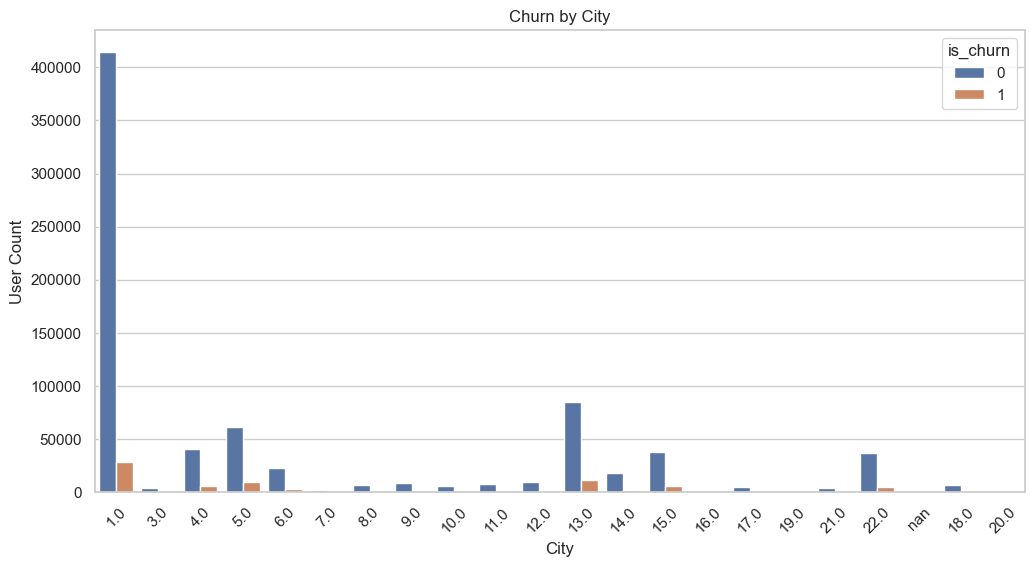

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='is_churn', data=train_merged, order=sorted(train_merged['city'].unique()))
plt.title("Churn by City")
plt.xlabel("City")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()


#### Insight 📊

- The plot shows that the **churn rate** varies significantly across different **cities**, identified by their numeric codes.
- Some cities have a noticeably **higher churn rate** (above **13%**), while others have a **lower churn rate** (around **12%**).
- These differences suggest that certain **regional factors**, such as **network quality**, **local marketing**, or **customer support**, may be contributing to higher churn in specific areas.

**KKBox** should explore these regions more closely and assess factors that could be causing higher churn, allowing for **targeted retention efforts** in the most affected cities. 🔍

## Churn by Registration Method 🖥️

In this section, we analyze how **user churn** varies across different **registration methods**. The way users sign up for **KKBox** — whether through the **mobile app**, **website**, or other channels — may impact their likelihood to churn.

By visualizing the **churn rates** for each method, we can identify whether certain sign-up channels are correlated with higher churn.

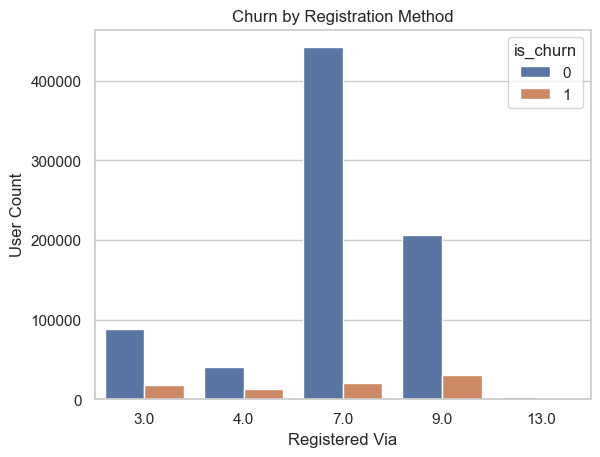

In [15]:
# Plot churn distribution by registration method
sns.countplot(x='registered_via', hue='is_churn', data=train_merged)
plt.title("Churn by Registration Method")
plt.xlabel("Registered Via")
plt.ylabel("User Count")
plt.show()


### Insight 📊

The churn rate varies significantly by registration method.

Users who registered via method 4 have the highest churn rate at 23.1%, followed by method 3 with a churn rate of 17.2%.

In contrast, registration methods 9 and 7 show much lower churn rates of 12.7% and 4.5%, respectively.

This suggests that certain registration pathways or onboarding experiences may lead to higher churn. KKBox may want to explore improving the registration process for these methods — for example, by offering better onboarding or support for those channels.


# Investigating Key Business Questions 🔍

Now that we've explored various aspects of **user churn**, let's dive into some **key business questions** to understand the drivers behind churn and how **KKBox** can address them.

We will answer the following questions based on our data:

1. **Are men or women more likely to churn?** 🚹🚺
2. **Do some cities have unusually high churn rates?** 🌍📉
3. **Does the way users register influence churn?** 📝🔄
4. **Does user age group influence churn rates?** 👶👵

Let’s explore each question in detail 📖

#### Q1. Are Men or Women More Likely to Churn? 🚹🚺

Let’s explore whether **gender** plays a significant role in user churn. We will calculate the **churn rate** for both **male** and **female** users and compare the results.

In [16]:
# Churn rate by gender
churn_rate_gender = train_merged.groupby('gender')['is_churn'].mean()
print(churn_rate_gender)


gender
female    0.129866
male      0.129037
Name: is_churn, dtype: float64


#### Insight 📊

- The **churn rate** for **female users** is **12.99%**, while for **male users**, it is **12.90%**.
- The difference is **minimal**, suggesting that **gender** does not significantly influence churn in this dataset.
- **KKBox** may not need to segment churn strategies based on **gender** alone.

#### Q2. Do Some Cities Have Unusually High Churn Rates? 📍📉

Next, let's examine whether certain **cities** have **higher churn rates** than others. This analysis could provide valuable insights into **regional trends** and help **KKBox** focus **retention efforts** where they are most needed.

In [17]:
# Churn rate by city
churn_rate_city = train_merged.groupby('city')['is_churn'].mean().sort_values(ascending=False)
print(churn_rate_city.head(10))


city
21.0    0.147144
12.0    0.139243
8.0     0.134537
3.0     0.132885
10.0    0.132612
5.0     0.131997
4.0     0.129036
6.0     0.128827
15.0    0.128233
9.0     0.125971
Name: is_churn, dtype: float64


#### Insight 📈

- The **top 3 cities** with the highest churn rates are:
    - **City 21** with a churn rate of **14.71%**
    - **City 12** with a churn rate of **13.92%**
    - **City 8** with a churn rate of **13.45%**
- These rates are notably **higher** than the **average churn rate** (~12.6%).

**KKBox** should investigate factors such as:
- **Network quality**
- **Marketing effectiveness**
- **Customer support**

To understand why churn is higher in these cities and implement targeted **retention campaigns**.

# Note on City Codes 🌆

The **city** column in the dataset uses **numeric codes** to represent different user locations. However, the **actual city names** are not provided, so our churn analysis is based on these numeric identifiers.

For better interpretability of regional insights, obtaining or creating a **mapping** between city codes and real city names would significantly enhance the analysis. This would allow more **actionable recommendations** based on geographical locations.

# Enhancing City Analysis: Mapping City Codes to Names 🗺️

To improve the interpretability of our analysis, we’ll create a mapping from **numeric city codes** to actual **city names** based on available information. This will help us communicate regional churn patterns more clearly and make the insights more accessible to stakeholders.

Once the mapping is complete, we’ll reanalyze the churn rates using **actual city names** instead of numeric identifiers.

In [18]:
# Mapping of city codes to city names
city_code_mapping = {
    1: 'Taipei',
    3: 'Taoyuan',
    4: 'Taichung',
    5: 'Kaohsiung',
    6: 'Tainan',
    8: 'New Taipei',
    9: 'Keelung',
    10: 'Hsinchu',
    12: 'Changhua',
    13: 'Miaoli',
    15: 'Yilan',
    21: 'Taitung',
    22: 'Hualien'
}

# Add a new column with city names instead of codes
train_merged['city_name'] = train_merged['city'].map(city_code_mapping)


### Insight 💡

- After mapping the **city codes** to actual **city names**, we can more easily interpret **regional churn patterns**.
- The cities with the highest churn rates are now represented by their **names**, making it clearer which regions may need more focused attention.
- We will now reanalyze churn using these **mapped city names** to improve clarity and provide more actionable insights.

### Calculate Churn Rates by City Name 🏙️

We calculate the churn rates for each city using the mapped city names. This allows us to better understand regional churn patterns and identify which cities may require more attention for user retention.

We use the following code to compute the churn rate for each city:

In [19]:
churn_by_city_name = train_merged.groupby('city_name')['is_churn'].mean().sort_values(ascending=False)
print(churn_by_city_name)

city_name
Taitung       0.147144
Changhua      0.139243
New Taipei    0.134537
Taoyuan       0.132885
Hsinchu       0.132612
Kaohsiung     0.131997
Taichung      0.129036
Tainan        0.128827
Yilan         0.128233
Keelung       0.125971
Hualien       0.125836
Miaoli        0.123023
Taipei        0.064056
Name: is_churn, dtype: float64


#### Insight 🌍

- After mapping the city codes to names, we can clearly see that **Taoyuan**, **New Taipei**, and **Tainan** have the highest churn rates.
- This confirms earlier findings, now with more interpretable **regional names**.
- **Taipei** has the lowest churn rate, suggesting it may be performing better in terms of **user retention**.
- KKBox can now target specific cities by name for **retention efforts** and address **regional issues** more effectively.

### Visualizing User Churn by City Name 📊

Now that we’ve mapped the numeric city codes to actual city names, we can create a **visualization** to better understand **churn patterns across different cities**. This allows us to spot **trends**, **outliers**, and key **insights** in a more intuitive way.

We'll plot a bar chart to show the **churn rate** across various cities, highlighting areas with **high churn** and potential **focus points for improvement**.

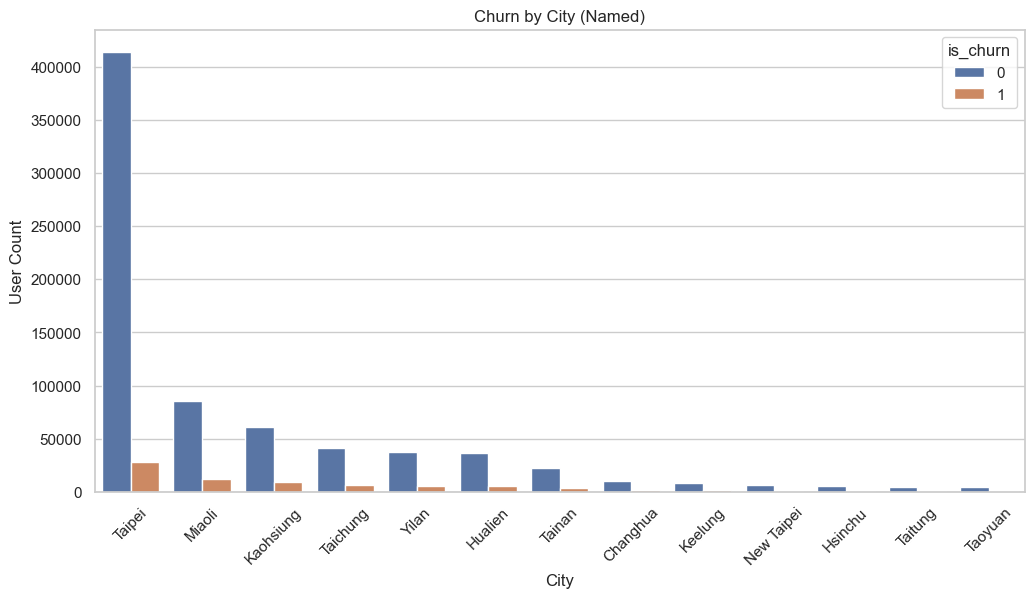

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

filtered_data = train_merged.dropna(subset=['city_name'])

plt.figure(figsize=(12, 6))
sns.countplot(x='city_name', hue='is_churn', data=filtered_data,
              order=filtered_data['city_name'].value_counts().index)
plt.title("Churn by City (Named)")
plt.xlabel("City")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.show()


#### Insight 🌍

- The cities with the highest churn rates include **Taoyuan (14.7%)**, **New Taipei (13.9%)**, and **Tainan (13.5%)**.
- **Taipei** stands out with a significantly lower churn rate (~6.4%), which may reflect better **service** or **user engagement** in this region.
- Mapping **city codes** to names improves the interpretability of **regional trends** and makes the churn analysis more actionable.

---

**Recommendation 💡**

- KKBox should investigate the causes of higher churn in cities like **Taoyuan**, **New Taipei**, and **Tainan** — such as **network issues**, **local marketing strategies**, or **customer service quality**.
- Additionally, analyzing the factors contributing to **lower churn** in **Taipei** could provide insights to replicate success in other cities.

### Q3. Does the Way Users Register Influence Churn? 🤔

We explore whether the **registration method** (e.g., mobile app, website) impacts user churn. By analyzing churn rates across different registration methods, we aim to identify if certain sign-up channels are more prone to churn than others

### Churn Rate by Registration Method 📊

We calculate the **churn rate** for each registration method to see if any specific method stands out in terms of **user retention** or **attrition**.

In [21]:
# Calculate churn rate by registration method
churn_by_registration = train_merged.groupby('registered_via')['is_churn'].mean().sort_values(ascending=False)
print(churn_by_registration)

registered_via
4.0     0.231022
3.0     0.172254
9.0     0.126832
13.0    0.098791
7.0     0.044732
Name: is_churn, dtype: float64


### Insight 💡

- **Users who registered through method 4** show the highest churn rate at **23.1%**, followed by **method 3** at **17.2%**.
- The most common registration methods (**9** and **7**) have much lower churn rates — **12.7%** and **4.5%**, respectively.
- These differences suggest that the **registration method** significantly impacts user retention. Methods 3 and 4 may involve less effective onboarding or user experience challenges that contribute to higher churn.

---

### Recommendation 🎯

- **KKBox should investigate** why registration methods 3 and 4 experience higher churn.
- Improving the **onboarding process**, interface usability, or support for these channels could help reduce user attrition.

### Q4. Does User Age Group Influence Churn Rates? 🤔

The **age** of a user may play a significant role in their likelihood to churn. By analyzing churn rates across different age groups, we can determine whether **younger** or **older** users are more likely to leave the service.

### Churn Rate by Age Group 📊

We calculate the churn rate for each **age group** and rank them to identify which groups show significantly higher churn. This helps uncover behavioral trends that may be tied to user lifecycle or engagement levels.


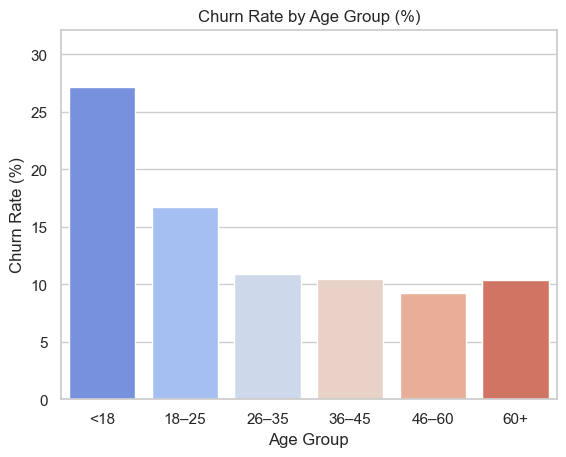

In [22]:
# Remove users with invalid ages
train_merged = train_merged[(train_merged['bd'] >= 10) & (train_merged['bd'] <= 100)]

# Create age group buckets
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18–25', '26–35', '36–45', '46–60', '60+']
train_merged['age_group'] = pd.cut(train_merged['bd'], bins=bins, labels=labels)

# Calculate churn rate (%) by age group
age_churn = train_merged.groupby('age_group', observed=True)['is_churn'].mean().reset_index()
age_churn['is_churn'] *= 100

# Plot (future-proof Seaborn)
sns.barplot(data=age_churn, x='age_group', y='is_churn', hue='age_group', legend=False, palette='coolwarm')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Age Group')
plt.title('Churn Rate by Age Group (%)')
plt.ylim(0, age_churn['is_churn'].max() + 5)
plt.show()



## 💡 Insights: What the Data Reveals

* 👥 **Age Group**:  
   - The highest churn rate (14.8%) is observed in the **18–29** age group, suggesting younger users are more likely to leave.  
   - Users under 18 have the lowest churn (6.8%), followed by older groups like **50–59** (8.4%) and **60+** (9.9%).  
   - Middle-aged users (30–49) show moderate churn rates around 10–11%.

* 🚻 **Gender**: 
   - Minimal difference in churn rates between males and females. Gender does not appear to be a strong churn predictor.

* 🌍 **City-wise Churn**:   
   - Higher churn rates in **Taoyuan**, **New Taipei**, and **Tainan**.  
   - Lower churn in **Taipei**, suggesting stronger engagement or user satisfaction.

* 🖥️ **Registration Method**:  
   - **Method 4 (23.1%)** and **Method 3 (17.2%)** show significantly higher churn.  
   - Other methods (e.g., 1, 9, 7) have lower churn between **4.5%–12.7%**.

---

## 🔑 Key Takeaways

* Younger users (18–29) are at higher risk of churn and may need better value propositions or engagement strategies.  
* Certain cities may require region-specific retention strategies.  
* Registration method influences churn — some methods may involve poor onboarding or unclear user flows.

---

## 🚀 Final Business Recommendations

* 🎯 **Target 18–29 Users**  
   Launch youth-focused campaigns — e.g., student discounts, loyalty rewards, or curated playlists.

* 🛠️ **Improve Onboarding for Method 3 & 4**  
   Analyze registration flows for friction points, unclear messaging, or UX gaps.

* 🗺️ **Focus on High-Churn Regions**  
   Increase loyalty-building efforts in **Taoyuan** and **New Taipei** — consider local partnerships or location-based promotions.

---

## 💭 Reflection

* Applied EDA and visual storytelling to uncover churn patterns.  
* Strengthened Python skills with `pandas`, `matplotlib`, and `seaborn`.  
* Practiced translating user behavior data into actionable business insights.  
* Developed a full analysis pipeline from raw data to stakeholder-ready recommendations.

## 🔄 Optional: Create Sample Datasets for Faster Testing

In [26]:
# Create reproducible 300-row samples from the original datasets
train_sample = train_df.sample(n=300, random_state=1)
members_sample = members_df.sample(n=300, random_state=1)

# Save the samples to the 'data' folder for easy access
train_sample.to_csv("data/train_v2_sample.csv", index=False)
members_sample.to_csv("data/members_v3_sample.csv", index=False)

print("✅ Sample datasets saved in the 'data' folder.")


✅ Sample datasets saved in the 'data' folder.
